# 📜 Welcome to the Order of Visioneers


You are a new intern in the ancient Order of Visioneers — a secret society tasked with recovering lost knowledge encoded in ancient visual artifacts. The Grand Archivist tells you:

> The Great Archive has been corrupted. Our only hope is to decode and reconstruct the fragments using the Algorithms of Sight. Only those who pass through the Five Gates may restore the World of Vision

But the Archivist also warns:

> Beware, interns. Those who attempt to pass the Gates with borrowed visions or false answers are cursed. Their sight is clouded, their names erased from the Hall of Records, and they are cast forever into the Void of Zero — where no Visioneer has honor, nor power. Only true effort unlocks the path.

You must pass through five gates, each guarded by a unique challenge — and each challenge maps to your assignments. Let's depart for the ***Gate 1***.

# 🌀 Gate 1 : The Chamber of Singular Truths

Theme: SVD, Image Reconstruction, Background-Foreground Separation

Deep in the archives lies a corrupted portrait of the First Visioneer. The portrait has lots of unnecessary elements and distraction. To pass the gate, you must:

> Decompose the portrait into its elemental forms, reconstruct what once was but with necessary elements only.

Run the following code to setup the assignment

In [ ]:
## Importing recipes
%matplotlib inline

import imageio
import numpy as np
import imageio.v2 as imageio
import moviepy.editor as mpe
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.animation as animation
from moviepy.editor import ImageSequenceClip

# Mounting google drive
drive.mount('/content/drive')

## Making recipes
video = mpe.VideoFileClip("/content/drive/My Drive/ES666CV/video/A/input.mp4")

def video_to_array(video):
    frames = np.array([rgb2gray(frame) for frame in video.iter_frames()])
    return frames
def array_to_video(images):
    fig, ax = plt.subplots()
    width, height = 320, 240   # pixels
    dpi = 200                  # dots per inch
    fig.set_size_inches(width / dpi, height / dpi)
    ax.axis('off')  # Remove axes
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    im = ax.imshow(images[0], cmap='gray', vmin=0, vmax=1)  # Initial frame

    def update(frame):
        im.set_array(images[frame])
        return [im]

    ani = animation.FuncAnimation(fig, update, frames=len(images), interval=1000/25)  # ~25 fps

    # Save as MP4 (requires FFmpeg; alternatively save as GIF with writer='pillow')
    ani.save('temp.mp4', writer='ffmpeg', fps=25, dpi=200)
    video = mpe.VideoFileClip('temp.mp4')
    plt.close()
    return video

def display_images_in_row(images, cmap='gray'):
    fig, axs = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
    if len(images) == 1:
        axs = [axs]
    for ax, img in zip(axs, images):
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



Mounted at /content/drive


### Task1: Forge the weapon - SVD (3 Marks)

Implement Singular Value Decomposition (SVD) from scratch.
You can use Numpy's Eigen Value Decomposition for your implementation.

Write your code in the commented part only

REF: https://medium.com/intuition/singular-value-decomposition-svd-working-example-c2b6135673b5
https://courses.grainger.illinois.edu/cs357/sp2021/notes/ref-16-svd.html

In [ ]:
def compute_svd(matrix: np.array) -> tuple:
    ## Your code here
    # in SVD, A(mxn) = (U(mxm)) mul (Σ(mxn)) mul (V^T(nxn))
    # in reduced SVD, A(mxn) = (U(mxr)) mul (Σ(rxr)) mul (V^T(rxn)), r = min(m, n)

    m, n = matrix.shape

    if m > n:
      # find V and sigma using A^T.A
      eigenvalues, eigenvectors = np.linalg.eigh(matrix.T @ matrix)
      ncols = np.argsort(eigenvalues)[::-1]
      v = eigenvectors[:, ncols]
      v_transpose = v.T
      eigenvalues = eigenvalues[ncols]       # sorted eigenvalues
      s = np.sqrt(np.clip(eigenvalues, 0, None))      # to avoid complex values for image
      # find U = A.V.Σ⁻¹
      u = (matrix @ v) / s

    else:
      eigenvalues, eigenvectors = np.linalg.eigh(matrix @ matrix.T)
      ncols = np.argsort(eigenvalues)[::-1]
      u = eigenvectors[:, ncols]
      eigenvalues = eigenvalues[ncols]          # sorted eigenvalues
      s = np.sqrt(np.clip(eigenvalues, 0, None))       # to avoid complex values for image
      # find V^T = Σ⁻¹.U⁻¹.A
      v_transpose = np.linalg.inv(np.diag(s)) @ u.T @ matrix

    return u, s, v_transpose

### Task 2: Decompose into elemental forms and reconstruct from true elements discarding unncessary elements (3 Marks)

1. Decompose image using SVD and reconstruct the image using only top $k$ singular values.
2. Experiment with different values of $k$ and visualize the results.
3. Plot reconstruction error by measuring Mean squared error between reconstructed and original image for different values of $k$.

Imageio: 'chelsea.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/chelsea.png (216 kB)
Downloading: 8192/221294 bytes (3.7%)221294/221294 bytes (100.0%)
  Done
File saved as /root/.imageio/images/chelsea.png.


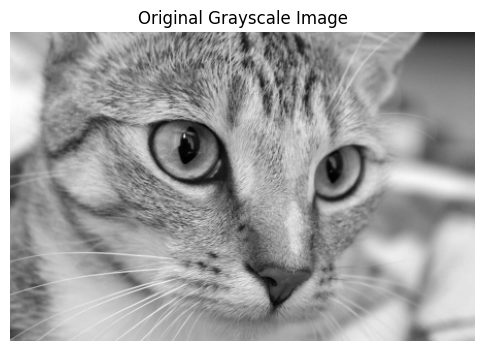

In [ ]:
# url = "https://upload.wikimedia.org/wikipedia/commons/a/af/Golden_retriever_eating_pigs_foot.jpg"  # If this image becomes unavailable (rare!) read some other from web
url = "imageio:chelsea.png"
image = imageio.imread(url)

gray_image = rgb2gray(image)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [ ]:
gray_image.shape

(300, 451)

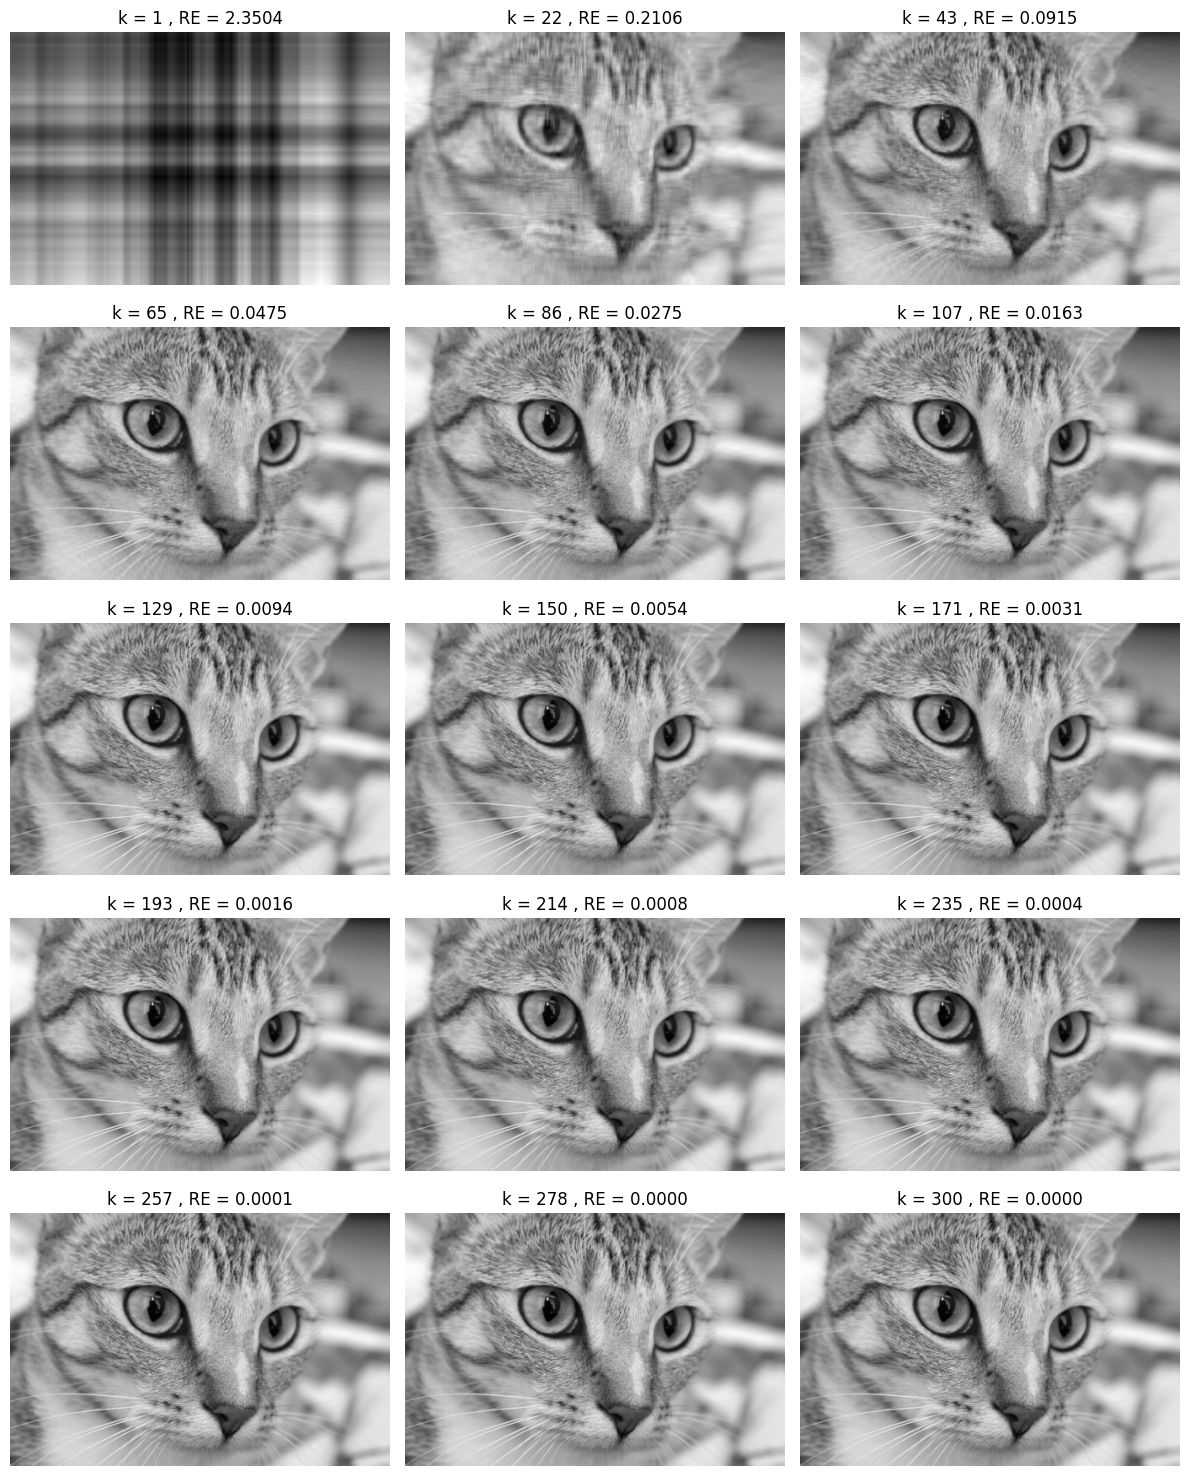

In [ ]:
def compress_image_using_topk_singular_values(gray_image, k):
    ## Your code here
    ## comment below line and update your code to return compressed image
    u, s, vt = compute_svd(gray_image)
    compressed_image = u[:, :k] @ np.diag(s[:k]) @ vt[:k, :]
    return compressed_image

def reconstruction_error(original, reconstructed):
    ## Your code here
    ## Comment below line and write your code
    m, n = original.shape
    mse = np.sum(np.square(original - reconstructed))/(m+n)
    return mse

m, n = gray_image.shape
k_values = np.linspace(1, min(m, n), 15, dtype=int)  # Lets visualize 15 images
plt.figure(figsize=(12, 15))
for i, k in enumerate(k_values):
    compressed_image = compress_image_using_topk_singular_values(gray_image, k)
    re = reconstruction_error(gray_image, compressed_image)
    # plt.subplot(3, 5, i + 1)
    plt.subplot(5, 3, i+1)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'k = {k} , RE = {re:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

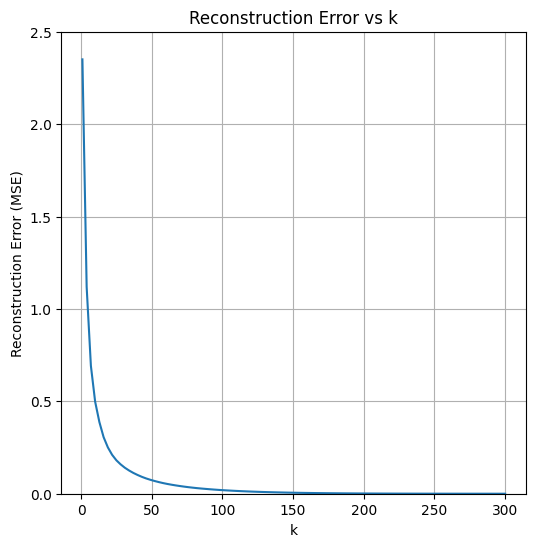

In [ ]:
# Plot Reconstruction error w.r.t. 'k'
k_values = np.linspace(1, min(m, n), 100, dtype=int)  # Lets sample more 100 k values for analysing how k affects reconstruction quality.
## Your code here for plot

re_values = []

for k in k_values:
  compressed_image = compress_image_using_topk_singular_values(gray_image, k)
  re = reconstruction_error(gray_image, compressed_image)
  re_values.append(re)

plt.figure(figsize=(6, 6))
plt.plot(k_values, re_values)
plt.title("Reconstruction Error vs k")
plt.xlabel("k")
plt.ylabel("Reconstruction Error (MSE)")
plt.ylim(0, 2.5)
plt.grid()
plt.show()

What value of $k$ do you think is enough for the image reconstruction. What is the benefit of this method?

Variance explained by top 20 singular values:
[9.42709e-01 1.52010e-02 9.81900e-03 4.99000e-03 4.32300e-03 3.39000e-03
 2.70200e-03 1.77300e-03 1.52400e-03 1.42700e-03 1.00000e-03 8.78000e-04
 8.10000e-04 7.75000e-04 6.39000e-04 5.81000e-04 4.96000e-04 4.52000e-04
 3.99000e-04 3.61000e-04]


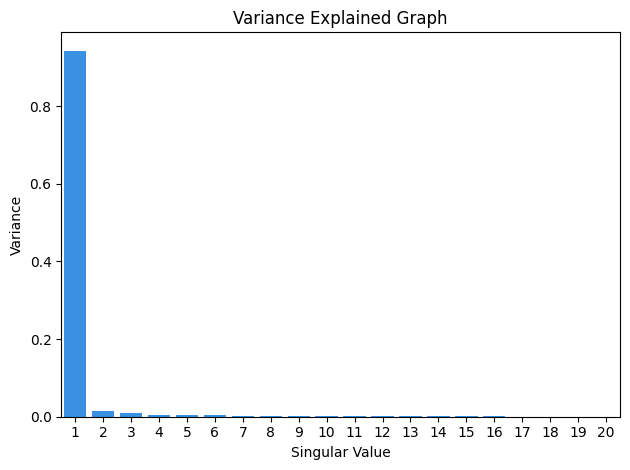

In [ ]:
import seaborn as sns
u, s, vt = compute_svd(gray_image)

# s = cp.asnumpy(s)

var_explained = np.round(s**2/np.sum(s**2), decimals=6)
print(f'Variance explained by top 20 singular values:\n{var_explained[0:20]}')

sns.barplot(x=list(range(1, 21)), y=var_explained[0:20], color="dodgerblue")
plt.title('Variance Explained Graph')
plt.xlabel('Singular Value')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

In [ ]:
compressed_image = compress_image_using_topk_singular_values(gray_image, 55)
re_55 = reconstruction_error(gray_image, compressed_image)
re_55

np.float64(0.06303934913937707)

The above graph shows that about 94.3% of the information in the image is explained by the first eigenvalue and its corresponding eigenvector. So instead of using all the eigenvalues, we can use just the top few eigenvalues for image reconstruction as it will give a good enough approximation.

From the reconstructed images of the cat above, we can see that somewhere between k = 43 to k = 65 is sufficient to reconstruct the cat while still preserving its quality. Using around ~55 eigenvectors instead of all the eigenvectors (300) also captures close to 100% of the variance in the image and has an MSE of 0.063. This method is beneficial because of:

1) massive decrease in computation for matrix multiplication
2) elimination of less important data in the image to produce a low-dimensional (compressed) approximation.
3) insight obtained into the structure of the data and the relationship between features using singular values and singular vectors.

### Task 3: Separate the truth from chaos and distraction (Marks 4)

Perform background-foreground separation using SVD.

In this task you might need help. So, the archivist called an expert who is too old to code but wise enough to guide you.

The expert will guide you and you will have to code it. First lets welcom the expert, "Prof. Dhoomketu" from Dholakpur

In [ ]:
video.ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In the above video, we want to focus on the building. But, the moving cars are distracting us. We want to remove them. Follow the instruction by Prof. Dhoomketu to complete this task

***Prof. Dhoomketu***: Currently we have video frames of shape (num_frames, height, width). Write a function that transforms this tensor to matrix of shape (height*width, num_frames). Ensure that the order of the frames is preserved.

In [ ]:
frames = video_to_array(video)
def transform_video_frames(frames: np.array):
    ## Write your code here
    # frames.shape = (250, 240, 320)
    num_frames, h, w = frames.shape
    frames = frames.transpose(1, 2, 0).reshape(-1, num_frames) # 250,240,320 -> 240,320,250 -> 76800,250
    return frames

matrix = transform_video_frames(frames)

***Prof. Dhoomketu***: Reconstruct the matrix using SVD with with very few of the top singular values (2 or 4 ). And rearrange the matrix to the original frame shape.

In [ ]:
# Write your code here and assign the results to the variables below based on Prof. Dhoomketu's instruction
reconstructed_matrix = compress_image_using_topk_singular_values(matrix, 4)

In [ ]:
print(reconstructed_matrix.shape)
reconstructed_frames = reconstructed_matrix.reshape(240, 320, 250).transpose(2, 0, 1)
reconstructed_frames.shape

(76800, 250)


(250, 240, 320)

***Prof. Dhoomketu***: Now visualize the first frames of the original and reconstructed videos. Just run the below code.
I have brought the visualization codes for you.

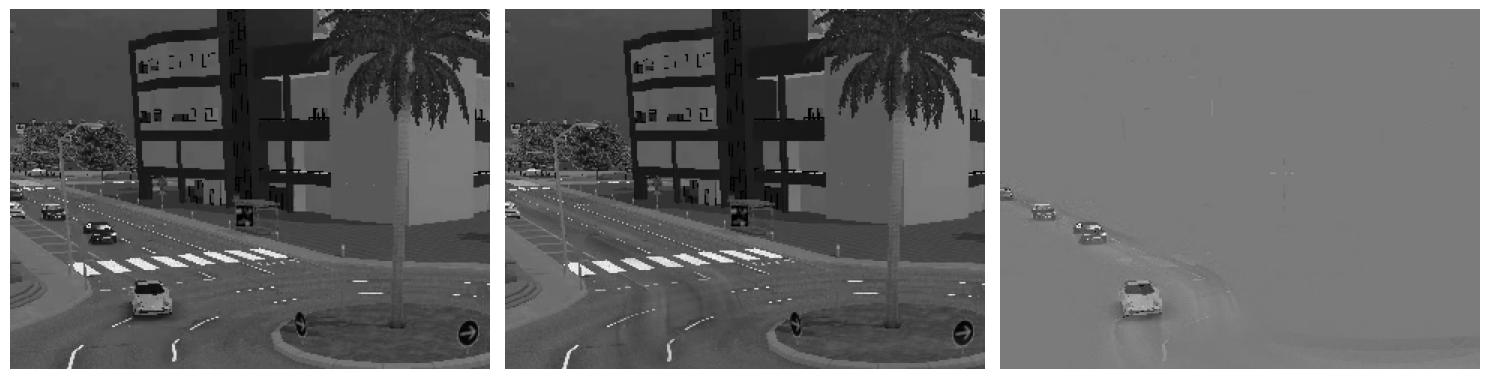

In [ ]:
display_images_in_row([frames[0], reconstructed_frames[0], frames[0] - reconstructed_frames[0]])

***Prof. Dhoomketu***: If you see that the cars are gone from the frames, it means you where able to successfully perform the separation of the distracting cars from the background.
Run the following code to visualize the separated cars from the video

In [ ]:
cars_only = frames - reconstructed_frames
cars_only = array_to_video(cars_only)
cars_only.ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


***Prof. Dhoomketu***: If you where able to successfully separate the cars, congratulations! But, I want to check if you understand whats going on behind the scenes? Why do you think the SVD-based approach was effective in this case?

HINT: Complete the following code for hints. Resize the original matrix and reconstructed matrix to shape (200,200). Visualize the resized matrices to get the hint. You can use the following syntax for resizing:

resized_original = resize(original, (200,200),anti_aliasing=False)

In [ ]:
## Write your code here
resized_original_matrix = resize(matrix, (200,200),anti_aliasing=False)
resized_reconstructed_matrix = resize(reconstructed_matrix, (200,200),anti_aliasing=False)

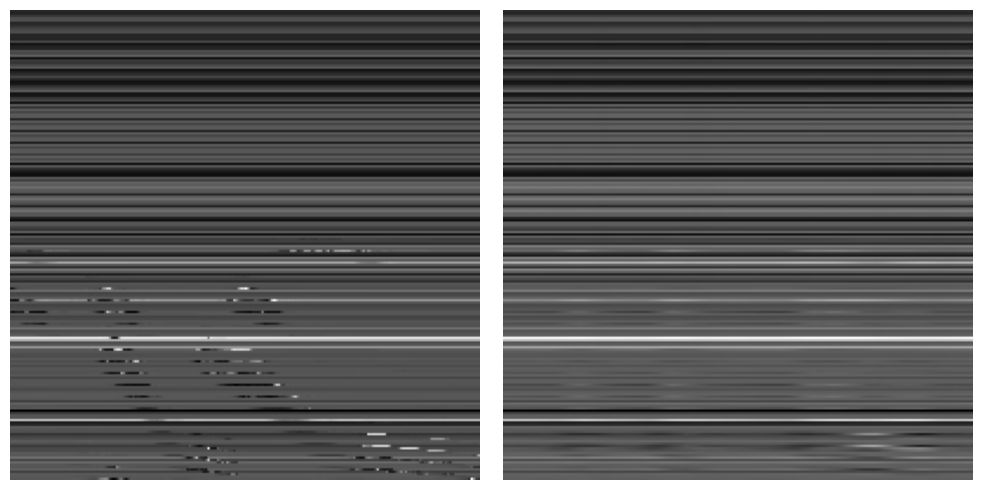

In [ ]:
display_images_in_row([resized_original_matrix, resized_reconstructed_matrix])

***Prof. Dhoomketu***: Q1: What do you observe? Answer my previous question using the observation here to complete the assignment.


The video ('frames') is converted to an image ('matrix') and we are applying SVD to that image. The matrix shape is 76800x250. 250 is the number of frames and 76800 elements in a frame correspond to a flattened frame.

By SVD, the singular values in the Σ matrix are in descending order. Top k SVD does a low rank approximation of an image, discarding the less significant singular values and singular vectors (those corresponding to noise or unwanted details). Since k is very low (k = 4), only the most important features describing the original matrix are retained, which here in the video corresponds to the static background that does not change over frames (road, building and tree). Hence after SVD, the reconstructed matrix, as compared to the original matrix, does not have the cars or the path traced by the cars because these are variable over frames and require higher singular values to approximate.

As a result, when the reconstructed matrix is reshaped into the reconstructed frames, the cars have vanished.

Q2: Why did we resized the matrices for visualization?


In [ ]:
matrix.shape

(76800, 250)

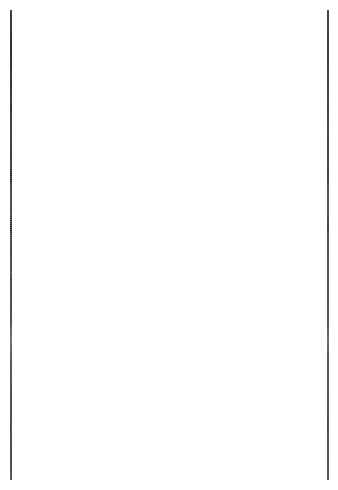

In [ ]:
display_images_in_row([matrix, reconstructed_matrix])

The shape of the matrices is (76800, 250) which means that it is very tall. So to visualize the breadth of the matrix we resized it to 200x200.